# Лабораторная работа №4
## Деревья решений
**Выполнил**: 6131-010402D, Музыка Артем

### Иморт набора данных и описания датасета

In [1]:
import pandas as pd
import numpy as np

Предварительные данные о количестве смертей по месяцам смерти в разбивке по возрастным группам, полу и расе/этнической принадлежности для отдельных основных причин смерти за период 2020 - 2021 годов. Окончательные данные представлены за 2019 год. Набор данных также включает в себя ежемесячные предварительные подсчеты смертей от КОВИД-19, кодируемые кодом МКБ-10 U07.1 в качестве основной или одной из причины смерти.

In [2]:
df = pd.read_csv('data/deaths.csv')
df.head(3)

,AnalysisDate,Date Of Death Year,Date Of Death Month,Start Date,End Date,Jurisdiction of Occurrence,Sex,Race/Ethnicity,AgeGroup,AllCause,...,Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)"
0,10/13/2021,2019,1,01/01/2019,01/31/2019,United States,F,Hispanic,0-4 years,182,...,0,4,0,1,0,22,1,0,0,0
1,10/13/2021,2019,1,01/01/2019,01/31/2019,United States,F,Hispanic,5-14 years,44,...,0,4,1,0,0,0,0,0,0,0
2,10/13/2021,2019,1,01/01/2019,01/31/2019,United States,F,Hispanic,15-24 years,122,...,0,0,2,1,2,4,6,1,0,0


1.   AnalysisDate                                                                                       `object`
2.  Date Of Death Year                                                                                  `int64` 
3.   Date Of Death Month                                                                                `int64` 
4.   Start Date                                                                                         `object`
5.   End Date                                                                                           `object`
6.   Jurisdiction of Occurrence                                                                         `object`
7.   Sex                                                                                                `object`
8.   Race/Ethnicity                                                                                     `object`
9.   AgeGroup                                                                                           `object`
10.  AllCause                                                                                           `int64 `
11.  NaturalCause                                                                                       `int64 `
12.  Septicemia (A40-A41)                                                                               `int64 `
13.  Malignant neoplasms (C00-C97)                                                                      `int64 `
14.  Diabetes mellitus (E10-E14)                                                                        `int64 `
15.  Alzheimer disease (G30)                                                                            `int64 `
16.  Influenza and pneumonia (J09-J18)                                                                  `int64 `
17.  Chronic lower respiratory diseases (J40-J47)                                                       `int64 `
18.  Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)                                 `int64 `
19.  Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)                              `int64 `
20.  Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)  `int64 `
21.  Diseases of heart (I00-I09,I11,I13,I20-I51)                                                        `int64 `
22.  Cerebrovascular diseases (I60-I69)                                                                 `int64 `
23.  COVID-19 (U071, Multiple Cause of Death)                                                           `int64 `
24.  COVID-19 (U071, Underlying Cause of Death)                                                         `int64 `

Удалим неинтересующие нас столбцы

In [3]:
L_del = ['AnalysisDate', 'Start Date', 'End Date']
try:
    for i in L_del:
        df.pop(i)
except:
    pass

При работе с датасетом было обнаружено, что пол обозначается неоднородно. Исправим это:

In [4]:
def sex_replce(S):
    if S == 'Female':
        S = S.replace('emale','')
    if S == "Male":
        S = S.replace('ale','')
    return S

In [5]:
df['Sex'] = df['Sex'].apply(sex_replce)

### 1. Для вашего датасета преобразовать категориальные признаки в бинарные с помощью `pd.factorize` / `pd.get_dummies`

In [6]:
L_object = ['Jurisdiction of Occurrence','Sex','Race/Ethnicity','AgeGroup']
for i in L_object:
    code, unique = pd.factorize(df[i])
    df[i] = code

In [7]:
Y = df['Sex']
df.pop('Sex')
X = df

#### 1.1 С помощью `sklearn.preprocesssing.StandartScaler` нормализовать значения признаков и построить для нормализованного датасета `KNeighborsClassifier` (без использования конвееров)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_X = pd.DataFrame(scaler.transform(df))

In [9]:
from sklearn.utils import shuffle
data_s, labels_s = shuffle(scaled_X, Y)
test_size = int(len(data_s) * 0.9)
Xtrain_s = data_s[:test_size]
Ytrain_s = labels_s[:test_size]
Xtest_s = data_s[test_size:]
Ytest_s = labels_s[test_size:]

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(Xtrain_s, Ytrain_s)
predict = classifier.predict(Xtest_s)
print(accuracy_score(Ytest_s, predict))

0.5


Разочаровающий результат. Чисто интересно, что будет на необработанных данных

In [11]:
data, labels = shuffle(X, Y)
test_size = int(len(data) * 0.9)
Xtrain = data[:test_size]
Ytrain = labels[:test_size]
Xtest = data[test_size:]
Ytest = labels[test_size:]

classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(Xtrain, Ytrain)
predict = classifier.predict(Xtest)
print(accuracy_score(Ytest, predict))

0.8333333333333334


#### 1.2 То же самое с использованием `sklearn.pipeline.Pipeline`

In [12]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', scaler),('svc', classifier)])
pipe.fit(Xtrain, Ytrain)
Pipeline(steps=[('scaler', scaler),('svc', classifier)])
pipe.score(Xtest, Ytest)

0.4898989898989899

#### 1.3 С помощью `GridSearchCV` произвести подбор гиперпараметра `KNeighboorsClassifier`(`n_neighbord`) и выведите значение гиперпараметра и метрику для наилучшей модели

In [13]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors': range(1,10)}
grid = GridSearchCV(KNeighborsClassifier(), parameters, cv=5)
grid.fit(np.array(Xtrain), np.array(Ytrain))
best_param = grid.best_params_
print(best_param)
classifier = KNeighborsClassifier(n_neighbors=best_param['n_neighbors'])
classifier.fit(Xtrain, Ytrain)
predict = classifier.predict(Xtest)
print(accuracy_score(Ytest, predict))

{'n_neighbors': 3}
0.8585858585858586


#### 2.1 Продемонстрировать работу `DecisionTreeClassifier`, посчитать метрики качесвта на отложенной выборке

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()
cross_val_score(tree_clf, X, Y, cv=20)

array([0.87373737, 0.85858586, 0.87878788, 0.85858586, 0.85353535,
       0.9040404 , 0.85858586, 0.87373737, 0.85353535, 0.85858586,
       0.8989899 , 0.85353535, 0.88888889, 0.84848485, 0.82828283,
       0.85858586, 0.9040404 , 0.86363636, 0.87373737, 0.71212121])

#### 2.2 С помощью `GridSearhCV` произвести подбор гиперпараметров для поиска наилучшего дерева (перебрать `max_depth`, `max_features` и может быть что-то еще)

In [17]:
tree_parameters = {'max_depth': range(1,10),
                    'max_features': ['auto', 'sqrt', 'log2', None],
                    'criterion': ['gini','entropy'],
                    'splitter': ['best', 'random'],
                    'random_state': range(0,5),
                    'max_leaf_nodes': range(1,20)
                    }
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_parameters, cv=5)
grid_tree.fit(np.array(Xtrain), np.array(Ytrain))

c:\Users\muzzo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
3600 fits failed out of a total of 68400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3600 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\muzzo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\muzzo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "c:\Users\muzzo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classe

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'max_leaf_nodes': range(1, 20),
                         'random_state': range(0, 5),
                         'splitter': ['best', 'random']})

In [18]:
tree_best_param = grid_tree.best_params_
print(tree_best_param)

{'criterion': 'gini', 'max_depth': 9, 'max_features': None, 'max_leaf_nodes': 19, 'random_state': 0, 'splitter': 'best'}


#### 2.3 Для полученного наилучшего дерева построить график `feature_importances` и дополнительно напечатать 3 наиболее важных признака, отсортировав их по убыванию важности

In [21]:
best_tree_model = DecisionTreeClassifier(max_depth=9,
                                        max_features=None, 
                                        criterion='gini',
                                        splitter='best',
                                        random_state=0,
                                        max_leaf_nodes=19)
best_tree_model.fit(Xtrain, Ytrain)

DecisionTreeClassifier(max_depth=9, max_leaf_nodes=19, random_state=0)

In [22]:
accuracy_score(best_tree_model.predict(Xtest), Ytest)

0.7196969696969697

In [23]:
importances = best_tree_model.feature_importances_

In [24]:
tree_importances = pd.Series(importances, index=X.columns)

C:\Users\muzzo\AppData\Local\Temp\ipykernel_5860\919183710.py:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


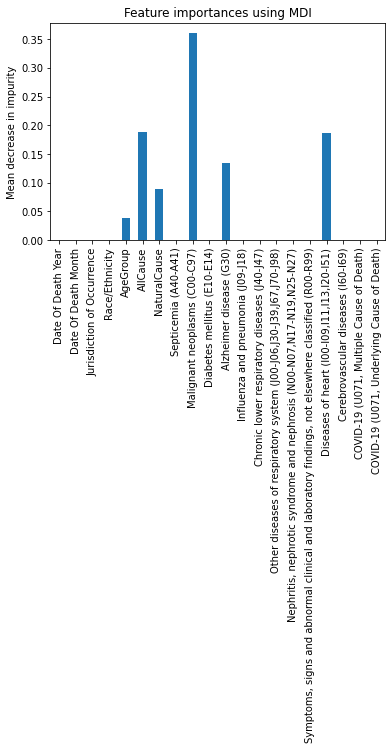

In [25]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
tree_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

#### 3.1 Продемонстрировать работу случайного леса `RandomForestClassifier`

In [26]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(Xtrain, Ytrain)
accuracy_score(forest.predict(Xtest), Ytest)

0.8914141414141414

#### 3.2 С помощью `GtidSearchCV` произвести подбор гиперпараметров для поиска наилучшего леса, посмотреть насколько улучшились метрики

In [27]:
forest_parameters = {'n_estimators': range (100, 105),
                    'criterion': ['gini','entropy'],
                    'min_samples_split': range(1,5),
                    'min_samples_leaf': range(0,5),
                    'max_features': ['auto','sqrt', 'log2']
                    }
grid_forest = GridSearchCV(RandomForestClassifier(), forest_parameters, cv=5)
grid_forest.fit(np.array(Xtrain), np.array(Ytrain))
forest_best_param = grid_forest.best_params_
print(forest_best_param)

c:\Users\muzzo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1200 fits failed out of a total of 3000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
600 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\muzzo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\muzzo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "c:\Users\muzzo\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\paralle

{'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 101}


In [29]:
best_forest_model = RandomForestClassifier(n_estimators=101,
                                            criterion='entropy',
                                            min_samples_split=2,
                                            min_samples_leaf=1,
                                            max_features='sqrt',
                                            )
best_forest_model.fit(Xtrain, Ytrain)
accuracy_score(best_forest_model.predict(Xtest), Ytest)

0.8863636363636364

### 4. Сделать выводы. Какой классификатор и с какими гиперпараметрами дал в итоге наилучший результат для выбранного датасета на отложенной выбоке